In [33]:
#Import libraries
import nltk
import sklearn
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from platform import python_version
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [29]:
#Check Version of different libaries
print('The python version is {}'.format(python_version()))
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))


The python version is 3.6.5
The nltk version is 3.3.
The scikit-learn version is 0.20.1.
The pandas version is 0.23.0.
The numpy version is 1.16.2.


In [75]:
# Import dataset
df = pd.read_csv('D:/DataSet/machine_data.csv')
df = df[df.Machine==0]

In [76]:
#Visualizing first `5` rows
df.head()

,Machine,Date,Time,Cycle,Ob1,Ob2,Ob5,Ob7,Ob8,Ob9,...,Ob100,Ob101,Ob102,Ob103,Ob104,Ob105,Ob106,Ob107,Ob108,Class
0,0,20170101,3601,13,4415.22,770.79,176.77,9.46,15.08,1.27,...,40.32,0.36,1.60,45.0,40.00,55.84,42.24,17.48,80.46,1
10,0,20170101,3602,19,3990.14,771.84,296.46,9.20,12.30,3.33,...,39.57,0.57,1.62,45.0,39.28,54.78,40.81,17.06,78.97,1
20,0,20170101,3603,25,4641.26,758.63,-0.28,8.16,9.12,3.57,...,40.36,0.59,1.58,45.0,38.32,55.34,42.49,10.30,79.71,1
30,0,20170101,3604,31,3800.49,603.15,296.67,8.60,8.43,3.53,...,40.13,0.58,1.58,45.0,41.39,55.54,42.28,9.18,81.82,1
40,0,20170101,3605,19,4445.38,552.20,39.38,9.55,9.36,3.50,...,41.56,0.58,1.47,45.0,40.92,54.79,40.45,9.34,78.20,1


In [103]:
# Select normal and anomaly data as well as class
normal_data=df[df.Class==0].iloc[:, 3: df.shape[1]-1].values
anomaly_data=df[df.Class==1].iloc[:, 3: df.shape[1]-1].values
normal_class = df.Class[df.Class==0]
anomaly_class = df.Class[df.Class==1]

In [78]:
#Split train test data(Normal)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(normal_data, normal_class, test_size = 0.3, random_state = 42)  

In [79]:
# Concat anomaly and normal data
y_train=np.concatenate([y_train, anomaly_class])
X_test=np.vstack((X_test, anomaly_data))
y_test=np.concatenate([y_test, anomaly_class])

In [80]:
print('Shape of training data:', X_train.shape)
print('Shape of testing data:', X_test.shape)

Shape of training data: (3153, 51)
Shape of testing data: (1847, 51)


In [81]:
# As I would like to use accuracy as a metric. So I will under sample test data
# Apply the random under-sampling for test data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True, random_state = 42)
X_test, y_test, idx_resampled = rus.fit_sample(X_test, y_test)

In [82]:
#Check number of noraml and anomaly in the test data after random under sampling
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 495, 1: 495}

In [83]:
#Normalize the train dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

#Normalize the test dataset
X_test = min_max_scaler.transform(X_test)

In [102]:
# Define classifier
clf = svm.OneClassSVM()
from sklearn.model_selection import ParameterGrid
# Specify parameter grid
grid = [{'kernel': ['linear'],'gamma': [1]}, 
    {'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3,  1e0, 5e0, 10e0]},
    {'kernel': ['poly'], 'gamma': [1e-1, 1e-2, 1e-3,  1e0], 'degree': [1,2,3,4,5,6,7,8]},
    {'kernel': ['sigmoid'],'gamma': [1e-1, 1e-2, 1e-3,  1e0, 5e0]}]
pram_dict = []
print('Accuracy for different parameter')
for z in ParameterGrid(grid):
    from sklearn import svm
    clf = svm.OneClassSVM()
    clf.set_params(**z)
    clf.fit(X_train)
    y_pred = clf.predict(X_test)
    #replace 1 as 0 and -1 as 1 according our data
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    #Calculate accuracy
    z['accuracy']= round((100*metrics.accuracy_score(y_test, y_pred)), 2)
    pram_dict.append(z)
    print(z)

Accuracy for different parameter
{'gamma': 1, 'kernel': 'linear', 'accuracy': 55.35}
{'gamma': 0.1, 'kernel': 'rbf', 'accuracy': 73.43}
{'gamma': 0.01, 'kernel': 'rbf', 'accuracy': 73.84}
{'gamma': 0.001, 'kernel': 'rbf', 'accuracy': 73.74}
{'gamma': 1.0, 'kernel': 'rbf', 'accuracy': 71.41}
{'gamma': 5.0, 'kernel': 'rbf', 'accuracy': 54.75}
{'gamma': 10.0, 'kernel': 'rbf', 'accuracy': 50.0}
{'degree': 1, 'gamma': 0.1, 'kernel': 'poly', 'accuracy': 55.35}
{'degree': 1, 'gamma': 0.01, 'kernel': 'poly', 'accuracy': 55.35}
{'degree': 1, 'gamma': 0.001, 'kernel': 'poly', 'accuracy': 55.35}
{'degree': 1, 'gamma': 1.0, 'kernel': 'poly', 'accuracy': 55.35}
{'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'accuracy': 54.95}
{'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'accuracy': 54.95}
{'degree': 2, 'gamma': 0.001, 'kernel': 'poly', 'accuracy': 54.44}
{'degree': 2, 'gamma': 1.0, 'kernel': 'poly', 'accuracy': 54.95}
{'degree': 3, 'gamma': 0.1, 'kernel': 'poly', 'accuracy': 54.04}
{'degree': 3, '

In [85]:
#print(pram_dict)
pram_dict = sorted(pram_dict, key = lambda i: float(i['accuracy']), reverse=True) 
pram_dict = pram_dict[0]
print("Best Parameter: ", pram_dict)

Best Parameter:  {'gamma': 0.01, 'kernel': 'rbf', 'accuracy': 73.84}


In [101]:
#Optimised One class SVM with best parameter
if (pram_dict.get('kernel') == 'linear'):
        clf = svm.OneClassSVM(kernel = pram_dict.get('kernel'))  
        clf.fit(X_train)
elif (pram_dict.get('kernel') == 'rbf'):
        clf = svm.OneClassSVM(kernel = pram_dict.get('kernel'), gamma = pram_dict.get('gamma'))
        clf.fit(X_train)
elif(pram_dict.get('kernel') == 'poly'):
        clf = svm.OneClassSVM(kernel = pram_dict.get('kernel'),
                              gamma = pram_dict.get('gamma'), degree = pram_dict.get('degree'))  
        clf.fit(X_train)
elif(pram_dict.get('kernel') == 'sigmoid'):
        clf = svm.OneClassSVM(kernel = pram_dict.get('kernel'), gamma = pram_dict.get('gamma'))  
        clf.fit(X_train)
else:
	print("No Kernel Found")
print(clf)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.01, kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)


In [98]:
#Get prediction from model
y_pred=clf.predict(X_test)

In [100]:
#Replace 1 (normal)  as 0(normal) and -1(anomaly) as 1(anomaly) according to our  own class y_test(0 as nomal and 1 as anomaly)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

In [90]:
#Calculate accuracy
from sklearn import metrics
print("Accuracy %0.2f" % (100*metrics.accuracy_score(y_test, y_pred)))

Accuracy 73.84


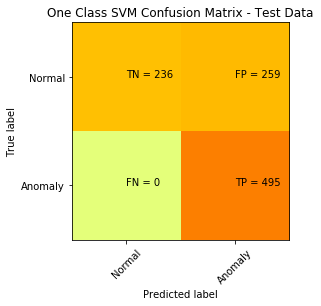

In [91]:
#Draw a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','Anomaly']
plt.title('One Class SVM Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [95]:
#Get True Positive, True Negative, False Positive and False Negative Individually
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
#Calculate Detection Rate and False Alarm Rate
print("Detection Rate w.r.t anomaly class: ", round((TP/(TP+FN)*100), 2))
print("False positives rate w.r.t anomaly class: ", round((FP/(FP+TN))*100, 2))

Detection Rate w.r.t anomaly class:  100.0
False positives rate w.r.t anomaly class:  52.32


In [96]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       495
           1       0.66      1.00      0.79       495

   micro avg       0.74      0.74      0.74       990
   macro avg       0.83      0.74      0.72       990
weighted avg       0.83      0.74      0.72       990

